In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [2]:
fd = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
fd.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
fd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
fd.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
fd.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
fd.shape

(6362620, 11)

In [9]:
for features in fd.columns:
    if fd[features].dtype=="object":
        fd[features] = pd.Categorical(fd[features])

In [10]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        category
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        category
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
dtypes: category(3), float64(5), int64(3)
memory usage: 705.7 MB


In [11]:
fd=fd.drop(["nameOrig","nameDest","isFlaggedFraud"],axis = 1)

In [12]:
fd=fd.drop(["step"],1)

In [13]:
from matplotlib import rcParams

In [14]:
plt.rcParams["figure.figsize"] = (11,9)

In [15]:
fd.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<AxesSubplot:>

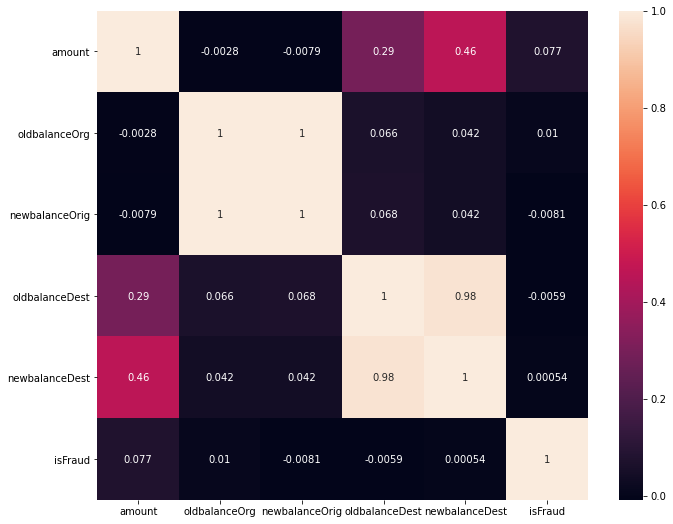

In [16]:
sns.heatmap(fd.corr(), annot = True)

In [17]:
#Univariate Analysis

In [ ]:
fd.

In [ ]:
sns.distplot(fd[])

In [18]:
#Bivariate Analysis

In [19]:
#Multivariate Analysis

In [20]:
#Get Dummies

In [21]:
fd.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [22]:
fd_dummies = pd.get_dummies(fd, prefix=["type"],drop_first = True)

In [23]:
fd_dummies.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [24]:
#model Building

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
x = fd_dummies.drop(["isFraud"], axis = 1)
y = fd_dummies.pop("isFraud")

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .30, random_state = 0)

In [28]:
rf = RandomForestClassifier(n_estimators=700,criterion="gini", max_depth=7, 
    min_samples_split=400,min_samples_leaf=25,oob_score = True, n_jobs = 1)

In [29]:
#Normalization usinf MinMaxScalar

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
sc = MinMaxScaler()

In [32]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
x_train

array([[2.11260263e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.03126254e-04, 1.57232883e-03, 1.74373183e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.03944106e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.08150562e-03, 1.77138682e-01, 2.16263235e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.70221642e-03, 1.88739526e-02, 3.48799534e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00183139e-03, 7.08176066e-05, 3.20907011e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [34]:
y_train

3019524    0
1012167    0
5551834    0
2081309    0
4457939    0
          ..
2249467    0
5157699    0
2215104    0
1484405    0
4500015    0
Name: isFraud, Length: 4453834, dtype: int64

In [35]:
#rf.fit(x_train, y_train)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
#ypred_train = rf.predict(x_train)
#ypred_test = rf.predict(x_test)

In [38]:
#accuracy score
print("Accuracy",accuracy_score(y_train,ypred_train))
#confusion Matrix
print("train",confusion_matrix(y_train,ypred_train))
print("test",confusion_matrix(y_test,ypred_test))
#classification Report
print("Train", classification_report(y_train,ypred_train))
print("Test" ,classification_report(y_test,ypred_test))
#Predict Probability
prob_train = rf.predict_proba(x_train)
prob_train = prob_train[:,1]
#Auc Score
auc = roc_auc_score(y_train,prob_train)
print("AUC TRAIN",auc)
#roc Curve (Train)
fpr, tpr, thresholds = roc_curve(y_train,prob_train)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
print("AUC:%.3f" %auc)
plt.show()
#predict Probability
prob_test = rf.predict_proba(x_test)
prob_test = prob_test[:,1]
#auc score
auc_test = roc_auc_score(y_test,prob_test)
print("AUC TEST",auc_test)
#roc_curve (Test)
fpr,tpr,threshold = roc_curve(y_test,prob_test)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
print("AUC:%.3f" %auc_test)

NameError: name 'ypred_train' is not defined

In [ ]:
#pip install imblearn

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler()

In [41]:
x_rus, y_rus = rus.fit_resample(x_train,y_train)

In [67]:
from imblearn.under_sampling import RandomUnderSampler

In [69]:
ros = RandomUnderSampler()

In [73]:
x_rus_test, y_rus_test = ros.fit_resample(x_test,y_test)

In [74]:
x_rus_test

array([[8.87871864e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.28262288e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.23025366e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.52053003e-02, 1.95844676e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35458239e-01, 2.11283299e-01, 4.45928670e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.33308258e-03, 5.58102199e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [75]:
y_rus_test

0       0
1       0
2       0
3       0
4       0
       ..
4833    1
4834    1
4835    1
4836    1
4837    1
Name: isFraud, Length: 4838, dtype: int64

In [ ]:
#logistic Regresion

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(x_rus,y_rus)

LogisticRegression()

In [ ]:
rf.fit(x_rus,y_rus)

In [77]:
ypred_rustrain = lr.predict(x_rus)
ypred_rustest = lr.predict(x_rus_test)

0.786416983085951
[[3333 2461]
 [  14 5780]]
[[1386 1033]
 [   5 2414]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      5794
           1       0.70      1.00      0.82      5794

    accuracy                           0.79     11588
   macro avg       0.85      0.79      0.78     11588
weighted avg       0.85      0.79      0.78     11588

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      2419
           1       0.70      1.00      0.82      2419

    accuracy                           0.79      4838
   macro avg       0.85      0.79      0.78      4838
weighted avg       0.85      0.79      0.78      4838

AUC TRAIN 0.9284804343917369
AUC:0.928


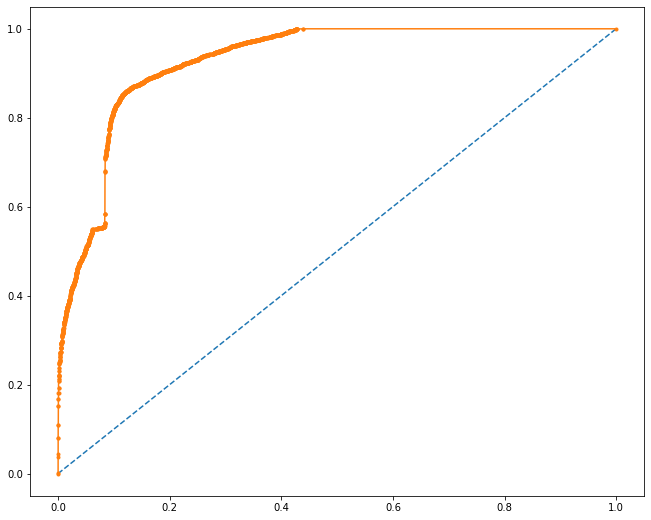

AUC TEST 0.9282239388771646
AUC:0.928


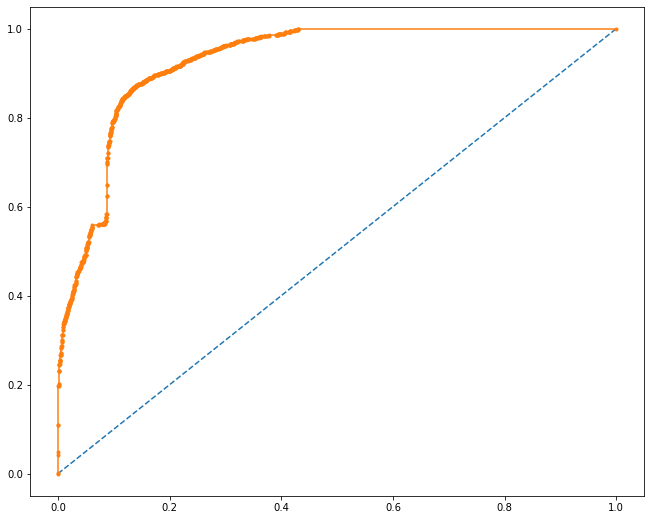

In [78]:
#accuracy score
print(accuracy_score(y_rus,ypred_rustrain))
#confusion Matrix
print(confusion_matrix(y_rus,ypred_rustrain))
print(confusion_matrix(y_rus_test,ypred_rustest))
#classification Report
print(classification_report(y_rus,ypred_rustrain))
print(classification_report(y_rus_test,ypred_rustest))
#Predict Probability
prob_train = lr.predict_proba(x_rus)
prob_train = prob_train[:,1]
#Auc Score
auc = roc_auc_score(y_rus,prob_train)
print("AUC TRAIN",auc)
#roc Curve (Train)
fpr, tpr, thresholds = roc_curve(y_rus,prob_train)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
print("AUC:%.3f" %auc)
plt.show()
#predict Probability
prob_test = lr.predict_proba(x_rus_test)
prob_test = prob_test[:,1]
#auc score
auc_test = roc_auc_score(y_rus_test,prob_test)
print("AUC TEST",auc_test)
#roc_curve (Test)
fpr,tpr,threshold = roc_curve(y_rus_test,prob_test)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
print("AUC:%.3f" %auc_test)

In [ ]:
#GridSearchCV

In [ ]:
#RandomForestClassifier

In [83]:
param_grid = {"n_estimators" : [100,300],"max_features": [5,6,7,8],"min_samples_leaf":[20,40],
              "min_samples_split":[20,40], "max_depth":[7,10]}
rf= RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf, param_grid=param_grid, cv=3 )

In [84]:
rf_grid.fit(x_rus,y_rus)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [5, 6, 7, 8],
                         'min_samples_leaf': [20, 40],
                         'min_samples_split': [20, 40],
                         'n_estimators': [100, 300]})

In [87]:
rf_best= rf_grid.fit(x_rus,y_rus)

In [88]:
rf_best.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 40,
 'n_estimators': 300}

In [90]:
rf_best.best_estimator_

RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=20,
                       min_samples_split=40, n_estimators=300)

In [91]:
ypred_rustrain = rf_best.predict(x_rus)
ypred_rustest = rf_best.predict(x_rus_test)

0.9919744563341387
[[5726   68]
 [  25 5769]]
[[2385   34]
 [   8 2411]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5794
           1       0.99      1.00      0.99      5794

    accuracy                           0.99     11588
   macro avg       0.99      0.99      0.99     11588
weighted avg       0.99      0.99      0.99     11588

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2419
           1       0.99      1.00      0.99      2419

    accuracy                           0.99      4838
   macro avg       0.99      0.99      0.99      4838
weighted avg       0.99      0.99      0.99      4838

AUC TRAIN 0.9997226726516153
AUC:1.000


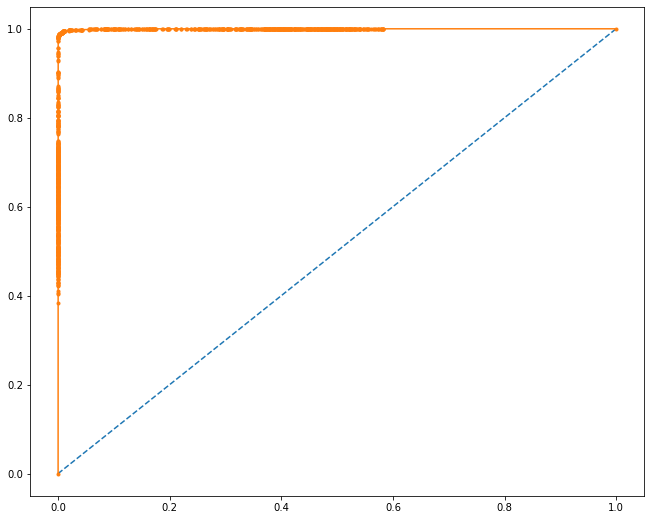

AUC TEST 0.9986714656140472
AUC:0.999


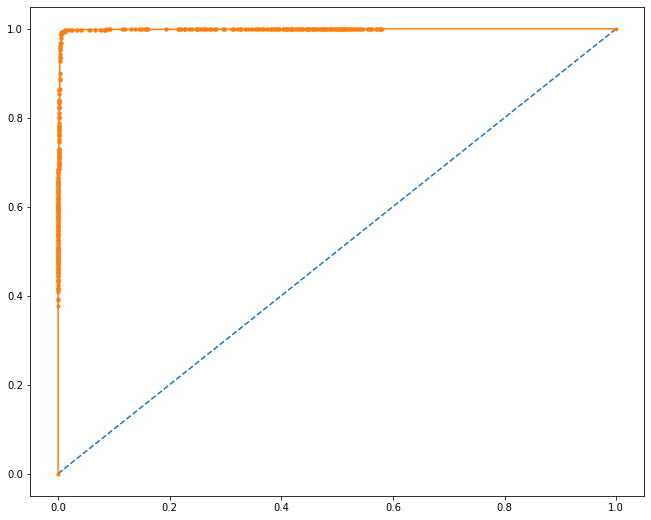

In [93]:
#accuracy score
print(accuracy_score(y_rus,ypred_rustrain))
#confusion Matrix
print(confusion_matrix(y_rus,ypred_rustrain))
print(confusion_matrix(y_rus_test,ypred_rustest))
#classification Report
print(classification_report(y_rus,ypred_rustrain))
print(classification_report(y_rus_test,ypred_rustest))
#Predict Probability
prob_train = rf_best.predict_proba(x_rus)
prob_train = prob_train[:,1]
#Auc Score
auc = roc_auc_score(y_rus,prob_train)
print("AUC TRAIN",auc)
#roc Curve (Train)
fpr, tpr, thresholds = roc_curve(y_rus,prob_train)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
print("AUC:%.3f" %auc)
plt.show()
#predict Probability
prob_test = rf_best.predict_proba(x_rus_test)
prob_test = prob_test[:,1]
#auc score
auc_test = roc_auc_score(y_rus_test,prob_test)
print("AUC TEST",auc_test)
#roc_curve (Test)
fpr,tpr,threshold = roc_curve(y_rus_test,prob_test)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
print("AUC:%.3f" %auc_test)

In [ ]:
#Pickle

In [94]:
import pickle

In [99]:
fraud_pickle = "fraud_model.pkl"

In [105]:
pickle.dump(rf_best, open(fraud_pickle,"wb"))